# Prepare data for GCN

## Exploration

In [1]:
import pandas as pd
import numpy as np
import pickle
from scipy.sparse import csr_matrix

In [2]:
df = pd.read_csv('clinical.csv')

In [3]:
df

,ID,SEX,MS_TYPE,AGE,EDSS,DATASET,DIAG_YEARS,BMI,THERAPY,outliers_V1,outliers_V2
0,p001,M,primary_progressive,40,7,2,11,19.918,Functional_electric_stimulation,0,14
1,p002,M,secondary_progressive,44,7,2,17,20.529,Motor_Program_Activating_Therapy,4,0
2,p003,M,primary_progressive,51,6,2,21,25.249,Functional_electric_stimulation,4,0
3,p004,M,relapsing_remitting,29,3,2,9,21.500,Functional_electric_stimulation,4,2
4,p005,F,secondary_progressive,60,6,2,21,21.411,Functional_electric_stimulation,0,4
5,p006,M,secondary_progressive,68,4,2,7,21.605,Motor_Program_Activating_Therapy,2,3
6,p007,F,relapsing_remitting,36,4,2,9,19.370,Functional_electric_stimulation,6,7
7,p008,F,relapsing_remitting,32,4,2,4,19.141,Functional_electric_stimulation,5,7
8,p009,F,relapsing_remitting,35,4,1,20,16.436,Motor_Program_Activating_Therapy,3,0
9,p010,M,secondary_progressive,54,6,2,12,23.148,Motor_Program_Activating_Therapy,20,6


In [4]:
col_names = lambda number_of_cols: [str(i) for i in range(number_of_cols)]

In [5]:
fc = pd.read_csv('FC/p001_1.csv', names = col_names(116))

In [6]:
fc

,0,1,2,3,4,5,6,7,8,9,...,106,107,108,109,110,111,112,113,114,115
0,1.000000,0.817564,0.204598,-0.078401,0.289494,0.090226,0.497704,0.089581,0.455409,0.053830,...,-0.072903,0.085836,-0.106347,-0.119842,-0.090812,0.042023,0.125418,-0.086712,-0.188296,-0.141228
1,0.817564,1.000000,0.254734,-0.085640,0.206634,0.032366,0.317668,0.094261,0.288953,0.005228,...,-0.157830,0.037733,-0.156203,-0.003416,-0.070900,-0.019105,0.062476,-0.051509,-0.160459,-0.176699
2,0.204598,0.254734,1.000000,0.418168,0.777710,0.337238,0.304956,0.337601,0.509011,0.358025,...,-0.035532,0.075027,-0.274796,-0.111992,-0.074269,-0.035510,0.064830,0.088095,0.248809,-0.259217
3,-0.078401,-0.085640,0.418168,1.000000,0.350748,0.794528,0.133066,0.378738,0.095346,0.442440,...,-0.195316,-0.066236,-0.181326,-0.076110,-0.161506,-0.148111,-0.069177,-0.020364,0.212961,-0.239621
4,0.289494,0.206634,0.777710,0.350748,1.000000,0.507826,0.553142,0.469009,0.713740,0.574525,...,0.022237,0.192382,-0.249915,-0.193518,-0.165759,0.023005,0.140473,0.108519,0.172550,-0.317077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,0.042023,-0.019105,-0.035510,-0.148111,0.023005,-0.172136,0.016610,-0.291438,-0.037145,-0.178627,...,-0.017592,0.304012,0.171264,0.045451,0.489263,1.000000,0.691592,0.286902,0.245557,-0.164185
112,0.125418,0.062476,0.064830,-0.069177,0.140473,-0.066660,0.139559,-0.105685,0.101847,-0.035088,...,0.122634,0.442138,0.079924,-0.119296,0.237733,0.691592,1.000000,0.481911,0.221168,-0.145863
113,-0.086712,-0.051509,0.088095,-0.020364,0.108519,-0.054478,0.078251,0.084112,0.101845,0.078863,...,0.198316,0.199112,0.129565,0.066621,0.114709,0.286902,0.481911,1.000000,0.438909,-0.277216
114,-0.188296,-0.160459,0.248809,0.212961,0.172550,0.096771,0.003083,0.178732,0.016812,0.156808,...,-0.058638,0.086031,-0.011735,0.100650,0.177972,0.245557,0.221168,0.438909,1.000000,-0.202847


In [7]:
def AdjacencyMatrixBuilder(dataframe):
    dataframe = dataframe.abs() 
    np.fill_diagonal(dataframe.values, 0)
    dataframe[dataframe >= 0.3] = 1
    dataframe[dataframe < 0.3] = 0
    return dataframe.astype(float)

In [8]:
adj_matrix = AdjacencyMatrixBuilder(fc)
adj_matrix

,0,1,2,3,4,5,6,7,8,9,...,106,107,108,109,110,111,112,113,114,115
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [9]:
graph = {}
for i, row in adj_matrix.iterrows():
    neighbors = []
    for j, cell in enumerate(row):
        if cell != 0.:
            neighbors.append(j)
    graph[i] = neighbors

### Feature Vectors

In [10]:
timeseries = pd.read_csv('AAL_timeseries/AAL_timeseries_p001_1.csv', names = col_names(240))

In [11]:
#timeseries = timeseries.iloc[:, :]
timeseries

,0,1,2,3,4,5,6,7,8,9,...,230,231,232,233,234,235,236,237,238,239
0,0.235880,0.095952,-0.102460,-0.270410,-0.352320,-0.308310,-0.129910,0.094736,0.201230,0.113960,...,-0.013827,-0.112620,-0.118920,-0.025889,0.068625,0.074128,0.000341,-0.069730,-0.081874,-0.061721
1,0.050882,-0.089753,-0.237680,-0.289080,-0.257160,-0.186650,-0.075639,0.060123,0.126510,0.060571,...,0.056955,-0.156190,-0.244910,-0.059034,0.199410,0.221550,0.007590,-0.124150,0.028220,0.267140
2,0.017501,-0.029667,-0.072963,-0.101700,-0.153150,-0.208000,-0.169150,-0.008773,0.132410,0.093976,...,0.086221,-0.064794,-0.058850,0.145940,0.272570,0.064013,-0.343620,-0.539940,-0.344280,-0.046338
3,0.159590,0.226590,0.270550,0.206010,0.047102,-0.097923,-0.133540,-0.072598,-0.013496,-0.027457,...,0.008891,-0.099811,-0.023526,0.190020,0.296520,0.127160,-0.194150,-0.373740,-0.286140,-0.115280
4,0.064679,0.020716,-0.079669,-0.229170,-0.360270,-0.358530,-0.165310,0.117690,0.275580,0.187020,...,-0.194560,-0.120740,0.118660,0.352260,0.329810,0.004407,-0.381600,-0.529460,-0.386230,-0.185710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,0.390550,0.248170,0.060483,-0.060242,-0.067948,0.004383,0.089800,0.137180,0.133950,0.100710,...,-0.176840,0.051892,0.181950,0.049265,-0.200980,-0.294370,-0.157360,0.023752,0.069264,0.020046
112,-0.041774,0.135880,0.284050,0.206020,-0.058926,-0.250150,-0.161660,0.115540,0.290110,0.213810,...,0.118850,0.282110,0.168960,0.012164,0.028648,0.151510,0.176750,0.046570,-0.123910,-0.223230
113,0.316260,0.342710,0.221110,-0.050085,-0.198740,-0.047271,0.194440,0.192760,-0.046190,-0.197440,...,0.069076,0.200690,0.264830,0.361470,0.441710,0.337350,0.042346,-0.202850,-0.207950,-0.090002
114,0.078547,0.127860,0.217180,0.267360,0.190350,0.039425,-0.021444,0.043106,0.053832,-0.118130,...,0.032060,-0.002567,0.117730,0.329230,0.426310,0.291770,0.005157,-0.265280,-0.421620,-0.476420


### Labels

In [12]:
labels = pd.DataFrame(np.ones([116, 1]))
#np.fill_diagonal(labels.values, 1.0)
labels

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
111,1.0
112,1.0
113,1.0
114,1.0


## Dataset Building

ind.dataset_str.x => the feature vectors of the training instances as scipy.sparse.csr.csr_matrix object;

ind.dataset_str.tx => the feature vectors of the test instances as scipy.sparse.csr.csr_matrix object;

ind.dataset_str.allx => the feature vectors of both labeled and unlabeled training instances
    (a superset of ind.dataset_str.x) as scipy.sparse.csr.csr_matrix object;
    
ind.dataset_str.y => the one-hot labels of the labeled training instances as numpy.ndarray object;

ind.dataset_str.ty => the one-hot labels of the test instances as numpy.ndarray object;

ind.dataset_str.ally => the labels for instances in ind.dataset_str.allx as numpy.ndarray object;

ind.dataset_str.graph => a dict in the format {index: [index_of_neighbor_nodes]} as collections.defaultdict
    object;
    
ind.dataset_str.test.index => the indices of test instances in graph, for the inductive setting as list object.

80 : 20 split -> 80% training instances 

93 rows / nodes are training instances and the rest test

In [13]:
def prepare_data(adj_matrix, features, labels):
    
    # list object to store all files
    data = list()
    
    # ind.dataset_str.x
    x = features.iloc[0:93]
    x = csr_matrix(x)
    data.append(x)

    # ind.dataset_str.tx
    tx = features.iloc[93:116]
    tx = csr_matrix(tx)
    data.append(tx)

    # ind.dataset_str.allx
    allx = features
    allx = csr_matrix(allx)
    data.append(allx)

    # ind.dataset_str.y
    y = labels.iloc[0:93].to_numpy()
    data.append(y)

    # ind.dataset_str.ty
    ty = labels.iloc[93:116].to_numpy()
    data.append(ty)

    # ind.dataset_str.ally
    ally = labels.to_numpy()
    data.append(ally)

    # ind.dataset_str.graph
    graph = {}
    for i, row in adj_matrix.iterrows():
        neighbors = []
        for j, cell in enumerate(row):
            if cell != 0.:
                neighbors.append(j)
        graph[i] = neighbors
    
    data.append(graph)

    # ind.dataset_str.test.index 
    index = list(i for i in range(93, 116))
    data.append(index)
    
    return data

In [14]:
def pickling(data, slug):
    ending = ['x', 'tx', 'allx', 'y', 'ty', 'ally', 'graph', 'test.index']
    
    for i in range(len(data)-1):
        with open('gcn/gcn/data/ind.p%s.%s' % (slug, ending[i]),  'wb') as f:
            pickle.dump(data[i], f)
    
    file = open('gcn/gcn/data/ind.p%s.test.index' % slug,'w')
    for index in data[7]:
        file.write(str(index)+'\n')
    file.close()
    
    return 0

In [202]:
for patient in range(1, 61):
    for treatment in range(1, 3):
        # {02} makes it a two digit number
        fc = pd.read_csv(f'FC/p{patient:03}_{treatment}.csv', names = col_names(116))
        adj_matrix = AdjacencyMatrixBuilder(fc)
        timeseries = pd.read_csv(f'AAL_timeseries/AAL_timeseries_p{patient:03}_{treatment}.csv', names = col_names(240))
        labels = pd.DataFrame(np.ones([116, 1]))

        data = prepare_data(adj_matrix, timeseries, labels)
        pickling(data, f'{patient:03}_{treatment}')

Now you can run the ```./generate_node_embeddings.sh``` script, which runs the GCN and exports node embedding vectors as ```np.ndarray```s to ```/gcn/gcn/embeddings```. The structure is the same as in ```FC/```.

We now have a representation for each node in each patient's graph before and after the treatment.

### Load node embeddings

In [16]:
before_treatment = []
after_treatment = []

for patient in range(1, 61):
    for treatment in range(1, 3):
        with open(f"gcn/gcn/embeddings/p{patient:03}_{treatment}.np", 'rb') as f:
            if treatment == 1:
                before_treatment.append(pickle.load(f, encoding='latin1'))
            else:
                after_treatment.append(pickle.load(f, encoding='latin1'))

In [17]:
len(before_treatment)

60

In [18]:
before_treatment[0]

array([[1796.0233 ,    0.     , 1613.5645 , ..., 3118.4668 , 1096.8413 ,
        2308.1267 ],
       [3013.7275 ,    0.     , 1446.791  , ..., 2147.302  ,    0.     ,
        2844.12   ],
       [   0.     ,    0.     , 1012.06177, ...,    0.     ,    0.     ,
           0.     ],
       ...,
       [2712.385  ,    0.     , 5387.0684 , ...,  623.71985,    0.     ,
        3406.043  ],
       [   0.     ,    0.     , 2198.0889 , ...,    0.     ,  566.95337,
        1213.8948 ],
       [   0.     , 2022.2019 ,  592.9818 , ...,    0.     ,    0.     ,
           0.     ]], dtype=float32)

### Visualize and compare node embeddings

In [19]:
from sklearn.decomposition import KernelPCA, TruncatedSVD
from matplotlib import pyplot as plt
import networkx as nx

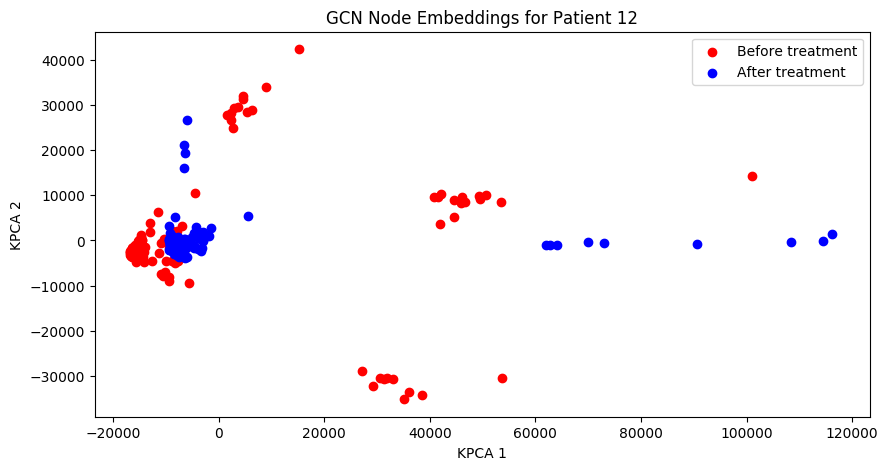

In [64]:
patient_num = 11

kpca = KernelPCA(n_components=2)
reduced_kpca_before = kpca.fit_transform(before_treatment[patient_num])
reduced_kpca_after = kpca.fit_transform(after_treatment[patient_num])

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(reduced_kpca_before[:,0], reduced_kpca_before[:,1], c='red', label='Before treatment')
ax.scatter(reduced_kpca_after[:,0], reduced_kpca_after[:,1], c='blue', label='After treatment')
ax.legend()
plt.title("GCN Node Embeddings for Patient %d" % (patient_num + 1))
plt.xlabel("KPCA 1")
plt.ylabel("KPCA 2")
plt.show();

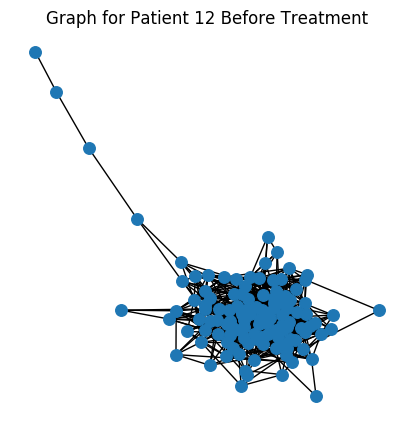

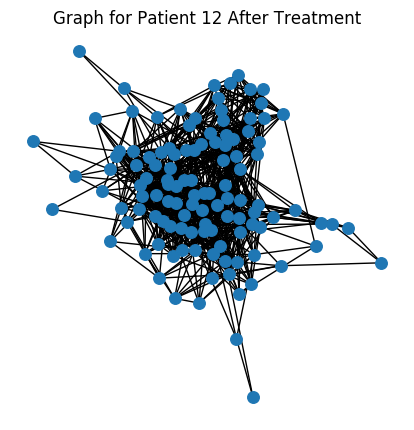

In [65]:
def visualize(G, tr, color=None, figsize=(5,5)):
    plt.figure(figsize=figsize)
    plt.xticks([])
    plt.yticks([])
    nx.draw(G, pos=nx.spring_layout(G, seed=84), with_labels=False, node_color=color, cmap="Set2", node_size=69)
    plt.title(f"Graph for Patient {patient_num + 1} {tr} Treatment")
    plt.show();


fc_before = pd.read_csv(f'FC/p{patient_num+1:03}_1.csv', names = col_names(116))
adj_matrix_before = AdjacencyMatrixBuilder(fc_before)
   
g_before = nx.from_numpy_matrix(adj_matrix_before.to_numpy())
g_before.remove_nodes_from(list(nx.isolates(g_before)))

visualize(g_before, 'Before')

fc_after = pd.read_csv(f'FC/p{patient_num+1:03}_2.csv', names = col_names(116))
adj_matrix_after = AdjacencyMatrixBuilder(fc_after)

g_after = nx.from_numpy_matrix(adj_matrix_after.to_numpy())
g_after.remove_nodes_from(list(nx.isolates(g_after)))

visualize(g_after, 'After')

### GCN dataset acceptance test

In [157]:
import numpy as np
import pickle as pkl
import networkx as nx
import scipy.sparse as sp
from scipy.sparse.linalg import eigsh
import sys

In [158]:
def parse_index_file(filename):
    """Parse index file."""
    index = []
    for line in open(filename):
        index.append(int(line.strip()))
    return index


def sample_mask(idx, l):
    """Create mask."""
    mask = np.zeros(l)
    mask[idx] = 1
    return np.array(mask, dtype=np.bool)


def load_data(dataset_str):
    """
    Loads input data from gcn/data directory

    ind.dataset_str.x => the feature vectors of the training instances as scipy.sparse.csr.csr_matrix object;
    ind.dataset_str.tx => the feature vectors of the test instances as scipy.sparse.csr.csr_matrix object;
    ind.dataset_str.allx => the feature vectors of both labeled and unlabeled training instances
        (a superset of ind.dataset_str.x) as scipy.sparse.csr.csr_matrix object;
    ind.dataset_str.y => the one-hot labels of the labeled training instances as numpy.ndarray object;
    ind.dataset_str.ty => the one-hot labels of the test instances as numpy.ndarray object;
    ind.dataset_str.ally => the labels for instances in ind.dataset_str.allx as numpy.ndarray object;
    ind.dataset_str.graph => a dict in the format {index: [index_of_neighbor_nodes]} as collections.defaultdict
        object;
    ind.dataset_str.test.index => the indices of test instances in graph, for the inductive setting as list object.

    All objects above must be saved using python pickle module.

    :param dataset_str: Dataset name
    :return: All data input files loaded (as well the training/test data).
    """
    names = ['x', 'y', 'tx', 'ty', 'allx', 'ally', 'graph']
    objects = []
    for i in range(len(names)):
        with open("gcn/gcn/data/ind.{}.{}".format(dataset_str, names[i]), 'rb') as f:
            if sys.version_info > (3, 0):
                objects.append(pkl.load(f, encoding='latin1'))
            else:
                objects.append(pkl.load(f))

    x, y, tx, ty, allx, ally, graph = tuple(objects)
    test_idx_reorder = parse_index_file("gcn/gcn/data/ind.{}.test.index".format(dataset_str))
    test_idx_range = np.sort(test_idx_reorder)

    if dataset_str == 'citeseer':
        # Fix citeseer dataset (there are some isolated nodes in the graph)
        # Find isolated nodes, add them as zero-vecs into the right position
        test_idx_range_full = range(min(test_idx_reorder), max(test_idx_reorder)+1)
        tx_extended = sp.lil_matrix((len(test_idx_range_full), x.shape[1]))
        tx_extended[test_idx_range-min(test_idx_range), :] = tx
        tx = tx_extended
        ty_extended = np.zeros((len(test_idx_range_full), y.shape[1]))
        ty_extended[test_idx_range-min(test_idx_range), :] = ty
        ty = ty_extended

    features = sp.vstack((x, tx)).tolil()
    features[test_idx_reorder, :] = features[test_idx_range, :]
    adj = nx.adjacency_matrix(nx.from_dict_of_lists(graph))
    print(features.shape)

    labels = np.vstack((y, ty))
    labels[test_idx_reorder, :] = labels[test_idx_range, :]
    print(labels.shape)

    idx_test = test_idx_range.tolist()
    idx_train = range(len(y))
    idx_val = range(test_idx_range.tolist()[-1], labels.shape[0]) # actually 500 i dont know why =>  with an additional validation set of 500 labeled examples for hyperparameter optimization
    print(idx_test)
    print(idx_train)
    print(idx_val)

    train_mask = sample_mask(idx_train, labels.shape[0])
    val_mask = sample_mask(idx_val, labels.shape[0])
    test_mask = sample_mask(idx_test, labels.shape[0])

    y_train = np.zeros(labels.shape)
    y_val = np.zeros(labels.shape)
    y_test = np.zeros(labels.shape)
    y_train[train_mask, :] = labels[train_mask, :]
    y_val[val_mask, :] = labels[val_mask, :]
    y_test[test_mask, :] = labels[test_mask, :]

    return adj, features, y_train, y_val, y_test, train_mask, val_mask, test_mask

In [159]:
adj, features, y_train, y_val, y_test, train_mask, val_mask, test_mask = load_data('ms')

(116, 240)
(116, 1)
[93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115]
range(0, 93)
range(115, 116)


/Users/christoph/Documents/Studium/Universität Wien/Informatik/WiSe22/DM/programming-task/task2/env/lib/python3.7/site-packages/scipy/sparse/lil.py:512: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not i.flags.writeable or i.dtype not in (np.int32, np.int64):
/Users/christoph/Documents/Studium/Universität Wien/Informatik/WiSe22/DM/programming-task/task2/env/lib/python3.7/site-packages/scipy/sparse/lil.py:514: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not j.flags.writeable or j.dtype not in (np.int32, np.int64):
/Users/christoph/Documents/Studium/Universität Wien/Informatik/WiSe22/DM/programming-task/task2/env/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by it

In [21]:
def sparse_to_tuple(sparse_mx):
    """Convert sparse matrix to tuple representation."""
    def to_tuple(mx):
        if not sp.isspmatrix_coo(mx):
            mx = mx.tocoo()
        coords = np.vstack((mx.row, mx.col)).transpose()
        values = mx.data
        shape = mx.shape
        return coords, values, shape

    if isinstance(sparse_mx, list):
        for i in range(len(sparse_mx)):
            sparse_mx[i] = to_tuple(sparse_mx[i])
    else:
        sparse_mx = to_tuple(sparse_mx)

    return sparse_mx


def preprocess_features(features):
    """Row-normalize feature matrix and convert to tuple representation"""
    rowsum = np.array(features.sum(1))
    r_inv = np.power(rowsum, -1).flatten()
    r_inv[np.isinf(r_inv)] = 0.
    r_mat_inv = sp.diags(r_inv)
    features = r_mat_inv.dot(features)
    return sparse_to_tuple(features)


def normalize_adj(adj):
    """Symmetrically normalize adjacency matrix."""
    adj = sp.coo_matrix(adj)
    rowsum = np.array(adj.sum(1))
    d_inv_sqrt = np.power(rowsum, -0.5).flatten()
    d_inv_sqrt[np.isinf(d_inv_sqrt)] = 0.
    d_mat_inv_sqrt = sp.diags(d_inv_sqrt)
    return adj.dot(d_mat_inv_sqrt).transpose().dot(d_mat_inv_sqrt).tocoo()


def preprocess_adj(adj):
    """Preprocessing of adjacency matrix for simple GCN model and conversion to tuple representation."""
    adj_normalized = normalize_adj(adj + sp.eye(adj.shape[0]))
    return sparse_to_tuple(adj_normalized)


def construct_feed_dict(features, support, labels, labels_mask, placeholders):
    """Construct feed dictionary."""
    feed_dict = dict()
    feed_dict.update({placeholders['labels']: labels})
    feed_dict.update({placeholders['labels_mask']: labels_mask})
    feed_dict.update({placeholders['features']: features})
    feed_dict.update({placeholders['support'][i]: support[i] for i in range(len(support))})
    feed_dict.update({placeholders['num_features_nonzero']: features[1].shape})
    return feed_dict

In [22]:
sparse_to_tuple(data[0])

(array([[  0,   0],
        [  0,   1],
        [  0,   2],
        ...,
        [ 92, 237],
        [ 92, 238],
        [ 92, 239]], dtype=int32),
 array([ 0.23588 ,  0.095952, -0.10246 , ..., -0.19177 , -0.2314  ,
        -0.17122 ]),
 (93, 240))

In [23]:
preprocess_features(data[1])

(array([[  0, 239],
        [  0, 238],
        [  0, 237],
        ...,
        [ 22,   2],
        [ 22,   1],
        [ 22,   0]], dtype=int32),
 array([-2583.97291197,   107.34279265,  2927.60399872, ...,
         -592.9600887 , -3137.91574281, -4457.9268293 ]),
 (23, 240))